In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.figsize": (20, 10)})

# Carregando os dados

In [2]:
covid_df = pd.read_excel("../dados/processados/casos_obitos_por_estado.xlsx")
covid_df.columns = ["uf", "casos", "obitos"]
covid_df.set_index("uf", inplace=True)

In [3]:
censo_df = pd.read_excel("../dados/processados/brasil_demografia_censo2010.xlsx")
censo_df.columns = ["uf", "rural", "urbana", "total"]
censo_df.set_index("uf", inplace=True)

In [4]:
economia_df = pd.read_excel("../dados/processados/economia_atlas2013.xlsx")
economia_df.set_index("UFN", inplace=True)

In [5]:
idade_df = pd.read_excel("../dados/processados/espectativa_de_vida_atlas2013.xlsx")
idade_df.set_index("UFN", inplace=True)

In [6]:
saude_df = pd.read_excel("/media/kenzo/Faculdade/repos/trabalho_sad/dados/processados/informacoes_saude.xlsx")
saude_df.set_index("Região/Unidade da Federação", inplace=True)

# Combinando tabelas

In [7]:
data_df = covid_df.join(censo_df)
data_df = data_df.join(economia_df)
data_df = data_df.join(idade_df, lsuffix="a")
data_df = data_df.join(saude_df)

In [8]:
data_df

,casos,obitos,rural,urbana,total,pctPobreza,vulnProbreza,rendaPerCapta,PEA,concRiqueza,A15,A18,A25,A65,leitosSus,totalLeitos,UBS
uf,,,,,,,,,,,,,,,,,
São Paulo,76815,5773,1676948,39585251,41262199,4.66,16.13,1084.46,21723910,46.87,32310780,30323379,25391883,3228313,52651,90502,4769
Rio de Janeiro,33582,3657,525690,15464239,15989929,7.23,22.26,1039.30,7852543,49.33,12586696,11814446,10017473,1425430,21011,32456,1880
Bahia,12488,397,3914430,10102476,14016906,28.72,52.71,496.73,6581418,51.05,10417051,9597387,7787985,1013309,22897,28961,3684
Espírito Santo,9274,394,583480,2931472,3514952,9.53,26.82,815.43,1832872,45.87,2693846,2511810,2071379,248796,5101,7930,819
Distrito Federal,5948,90,87950,2482210,2570160,4.93,16.00,1715.11,1408410,49.26,1961144,1829600,1494808,127625,4047,15867,149
Alagoas,5273,277,822634,2297860,3120494,34.29,59.76,432.56,1261201,51.76,2207366,2012326,1605052,187531,4740,5881,907
Minas Gerais,5873,201,2882114,16715216,19597330,10.97,28.85,749.69,9973375,45.98,15174142,14134428,11727697,1591549,26943,40946,5118
Rio Grande do Sul,5918,172,1593638,9100291,10693929,6.37,18.65,959.24,5831829,43.90,8419828,7890893,6682390,989885,20304,30093,2297
Pernambuco,25717,2050,1744238,7052210,8796448,27.17,51.86,525.64,3843266,52.57,6532393,6038351,4902899,648719,15699,20917,2400


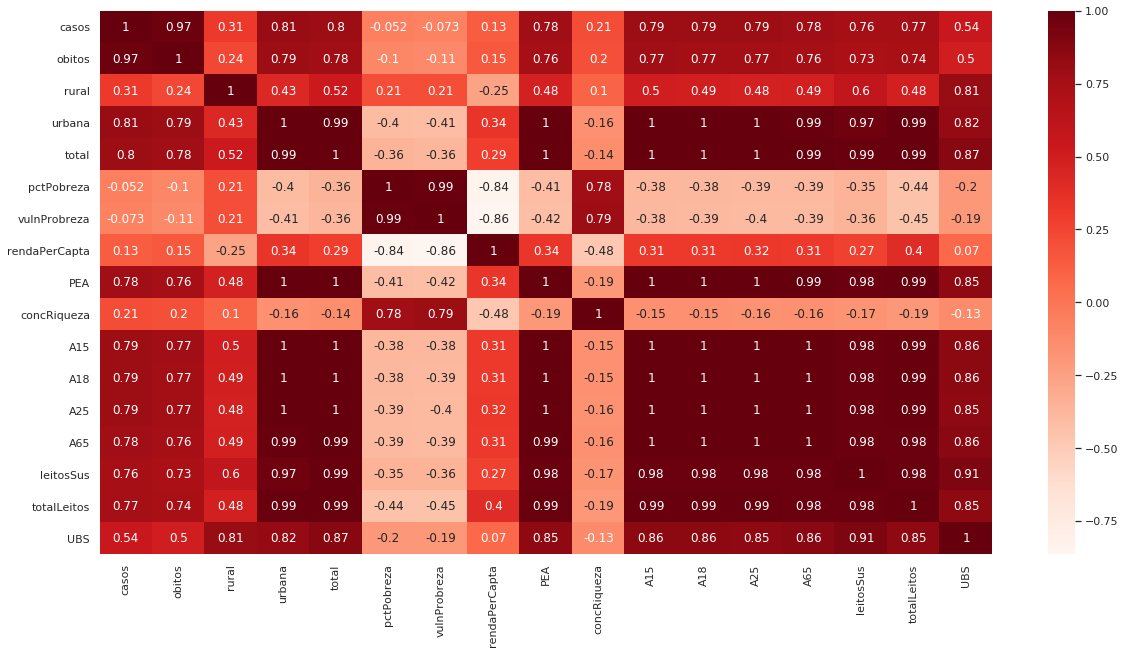

In [9]:
correlation = data_df.corr()
sns.heatmap(correlation, annot=True, cmap=plt.cm.Reds)

# Combinando resultados um único DataFrame

In [10]:
correlation_df = pd.DataFrame(index=data_df.columns, columns=["casosCor", "obitosCor"])
correlation_df["casosCor"] = correlation["casos"][correlation_df.index]
correlation_df["obitosCor"] = correlation["obitos"][correlation_df.index]

# Analisando casos

In [11]:
correlation_df.sort_values("casosCor", ascending=False, inplace=True)
correlation_df[["casosCor"]]

,casosCor
casos,1.000000
obitos,0.974480
urbana,0.807008
total,0.799045
A15,0.793641
A18,0.793082
A25,0.790325
PEA,0.779069
A65,0.775356
totalLeitos,0.765215


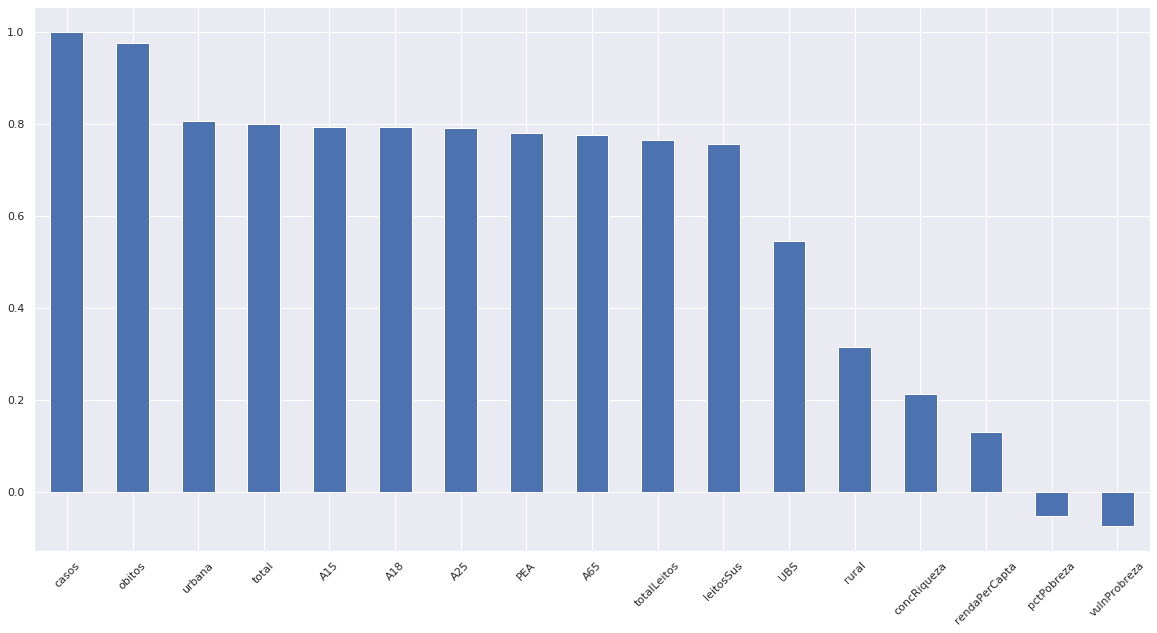

In [12]:
correlation_df["casosCor"].plot.bar(rot=45)

# Analisando óbitos

In [13]:
correlation_df.sort_values("obitosCor", ascending=False, inplace=True)
correlation_df[["obitosCor"]]

,obitosCor
obitos,1.000000
casos,0.974480
urbana,0.793501
total,0.777655
A15,0.774227
A18,0.774206
A25,0.773211
A65,0.763262
PEA,0.757459
totalLeitos,0.738996


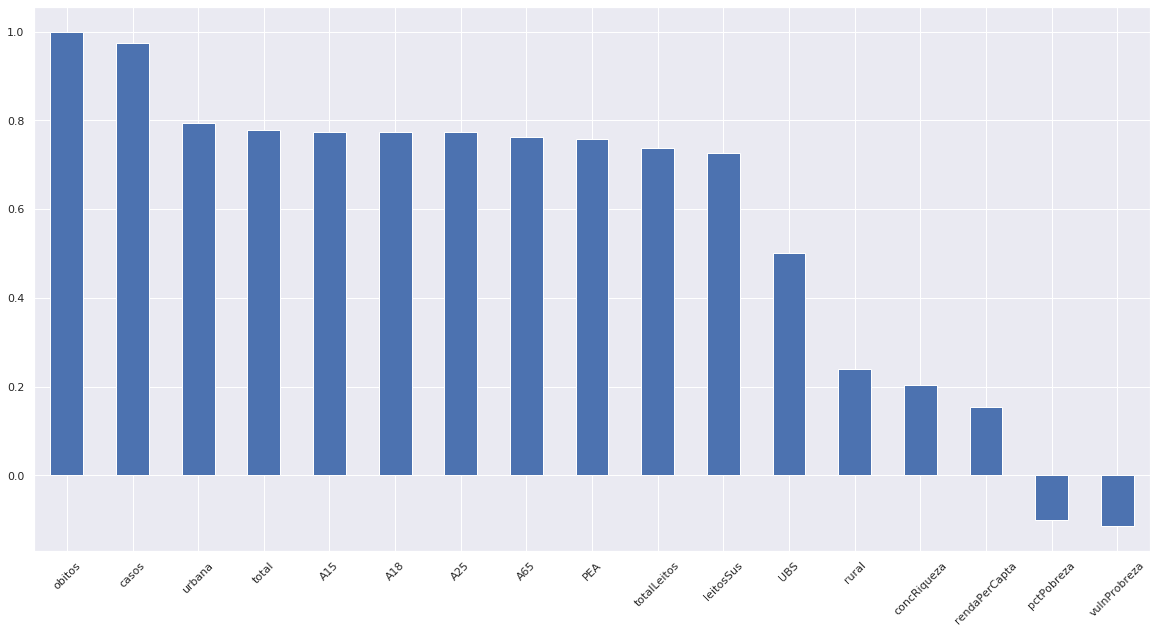

In [14]:
correlation_df["obitosCor"].plot.bar(rot=45)

# Ordenando por maiores correlações

In [19]:
data_df[["casos", "obitos"]].sort_values(by="casos", ascending=False).head(10)

,casos,obitos
uf,,
São Paulo,76815,5773
Rio de Janeiro,33582,3657
Ceará,33502,2251
Amazonas,27038,1669
Pernambuco,25717,2050
Pará,21469,1937
Maranhão,17212,693
Bahia,12488,397
Espírito Santo,9274,394


In [20]:
data_df.sort_values(by=["urbana", "total", "A15", "A18", "PEA"], ascending=False).head(10)

,casos,obitos,rural,urbana,total,pctPobreza,vulnProbreza,rendaPerCapta,PEA,concRiqueza,A15,A18,A25,A65,leitosSus,totalLeitos,UBS
uf,,,,,,,,,,,,,,,,,
São Paulo,76815,5773,1676948,39585251,41262199,4.66,16.13,1084.46,21723910,46.87,32310780,30323379,25391883,3228313,52651,90502,4769
Minas Gerais,5873,201,2882114,16715216,19597330,10.97,28.85,749.69,9973375,45.98,15174142,14134428,11727697,1591549,26943,40946,5118
Rio de Janeiro,33582,3657,525690,15464239,15989929,7.23,22.26,1039.30,7852543,49.33,12586696,11814446,10017473,1425430,21011,32456,1880
Bahia,12488,397,3914430,10102476,14016906,28.72,52.71,496.73,6581418,51.05,10417051,9597387,7787985,1013309,22897,28961,3684
Rio Grande do Sul,5918,172,1593638,9100291,10693929,6.37,18.65,959.24,5831829,43.90,8419828,7890893,6682390,989885,20304,30093,2297
Paraná,2939,146,1531834,8912692,10444526,6.46,19.70,890.89,5602720,43.86,8032686,7468159,6207261,786608,18482,27397,2310
Pernambuco,25717,2050,1744238,7052210,8796448,27.17,51.86,525.64,3843266,52.57,6532393,6038351,4902899,648719,15699,20917,2400
Ceará,33502,2251,2105812,6346569,8452381,30.32,54.85,460.63,3657038,50.76,6229587,5707035,4569300,637693,14352,18503,2126
Goiás,2300,93,583074,5420714,6003788,7.59,24.22,810.97,3168725,45.75,4557415,4235351,3470629,375237,10584,17502,1307
